# Low Rank Factorization

## Gradient Check
Let's confirm that gradients are computed correctly first.

In [1]:
import lowrank
import numpy as np

np.random.seed(0)
rand_training_mat = np.random.rand(5, 5)

# Randomly remove certain values to make the matrix sparse
rand_training_mat[rand_training_mat < 0.50] = 0 

# Pick out some set of values from the training set to be test set and then remove those values from training set
rand_test_mat = np.copy(rand_training_mat)
rand_test_mat[rand_training_mat < 0.90] = 0 
rand_training_mat[rand_test_mat != 0] = 0

print 'Randomly initialized training sparse matrix'
print rand_training_mat

print 'Randomly initialized test sparse matrix'
print rand_test_mat

factorizer = lowrank.Factorizer(rand_training_mat, rand_test_mat, feature_dim=3)

Randomly initialized training sparse matrix
[[0.5488135  0.71518937 0.60276338 0.54488318 0.        ]
 [0.64589411 0.         0.891773   0.         0.        ]
 [0.79172504 0.52889492 0.56804456 0.         0.        ]
 [0.         0.         0.83261985 0.77815675 0.87001215]
 [0.         0.79915856 0.         0.78052918 0.        ]]
Randomly initialized test sparse matrix
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.96366276 0.        ]
 [0.         0.         0.         0.92559664 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.97861834 0.         0.         0.         0.        ]]
Factorizer is instantiated with U: (5, 3) and M: (5, 3)


In [2]:
grad_u, grad_m = factorizer.gradients()
num_grad_u, num_grad_m = factorizer.num_gradients()

print 'Matrix discrepancy between analytical gradients and numerical gradients'
print np.matrix.round(grad_u - num_grad_u, decimals=10)
print np.matrix.round(grad_m - num_grad_m, decimals=10)

Matrix discrepancy between analytical gradients and numerical gradients
[[ 0. -0.  0.]
 [ 0. -0.  0.]
 [-0. -0. -0.]
 [-0. -0.  0.]
 [ 0.  0.  0.]]
[[-0.  0. -0.]
 [ 0. -0.  0.]
 [ 0. -0. -0.]
 [-0. -0. -0.]
 [-0. -0.  0.]]


## Real Data

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt


DATA_DIR = 'datasets/100k/'
converter = lowrank.MatrixConverter(movies_filepath=DATA_DIR + 'movies.csv',
                                    ratings_filepath=DATA_DIR + 'ratings.csv')
training_rating_mat, test_rating_mat = converter.get_rating_matrices()
factorizer = lowrank.Factorizer(training_rating_mat, test_rating_mat, feature_dim=10, reg=0.05)

CSV data are loaded with 44229 training samples and 5065 test samples from 79 users on 9125 movies
Factorizer is instantiated with U: (79, 10) and M: (9125, 10)


☑ training: |████████████████████| 100%- current cost: 16262.495841419233



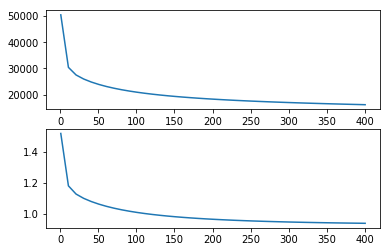

In [11]:
benchmarks = factorizer.train(steps=400, learning_rate=1e-4)
steps = [bm[0] for bm in benchmarks]
losses = [bm[1] for bm in benchmarks]
rmses = [bm[2] for bm in benchmarks]

plt.subplot(211)
plt.plot(steps, losses)
plt.subplot(212)
plt.plot(steps, rmses)
plt.show()

In [5]:
rmses

[1.5167161497579833,
 1.1793469908050143,
 1.1265508432103635,
 1.0989326961054156,
 1.0783288718223458,
 1.0614945278059513,
 1.047360708011663,
 1.0353330195182022,
 1.0249938573947,
 1.0160284173126306,
 1.0081937004424086,
 1.00129959725007,
 0.9951956602115262,
 0.9897615150938428,
 0.9848998272607943,
 0.9805310997284341,
 0.9765897923557533,
 0.9730213989600489,
 0.9697802237965913,
 0.9668276728671797,
 0.9641309276832178,
 0.9616619058653335,
 0.9593964389501871,
 0.9573136162542667,
 0.9553952568767703,
 0.9536254814745722,
 0.9519903623938079,
 0.9504776358463113,
 0.9490764635987808,
 0.9477772344658617,
 0.9465713980254032,
 0.9454513245896262,
 0.9444101867031967,
 0.9434418583936519,
 0.942540829141775,
 0.9417021301204835,
 0.9409212707087464,
 0.9401941836504197,
 0.9395171775179284,
 0.9388868953737192,
 0.9383002787103526]